In [128]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration.DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

### Q3 Compare platforms based on how long they stay competitive in market

* Get overall sales for each platform grouped by year
* Extract effective lifespan of each platform
* Get average of all platforms and compare each one with the average

## 1- Expectations: 

#### New platforms get the hype and keep increasing until they peak and then they start decreasing and by the time they are old, newer platforms take their share and repeat the cycle

## 2- Data Collection: 
    

In [129]:
ds = read_data(kind='dataset')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


#### Filter relevant columns

In [130]:
## Now Filter the data
## cols_to_keep
cols_to_keep = ['Platform', 'Global_Sales', 'Year_of_Release']

# filter
df = ds[cols_to_keep]
df.head()

,Platform,Global_Sales,Year_of_Release
0,Wii,82.53,2006.0
1,NES,40.24,1985.0
2,Wii,35.52,2008.0
3,Wii,32.77,2009.0
4,GB,31.37,1996.0


#### Handle Missing Values


In [131]:
print(df.isna().sum())
# very little percentage has nulls, we can just drop it!
df = handle_missing_values(df, handling_method='drop')

Platform             0
Global_Sales         0
Year_of_Release    269
dtype: int64
Total Number of rows : 16719
Number of rows with missing values: 269
Number of rows after dropping: 16450
Number of rows after handling missing values: 16450 and Number of missing values: 0


#### Handle Invalid Values Or Ourliers

In [132]:
# check validity of data
print(df['Platform'].unique())
print(df['Year_of_Release'].unique())
print('\n+ All CLEAN +')

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983. 2020. 2017.]

+ All CLEAN +


In [133]:
# global sales
GS = df['Global_Sales']
print(GS.describe())
# looks like outliers exist
# print all the outliers
print(GS[GS > 3])
print(GS[GS < 0.01])
print('\n+ Outliers Exist +')

count    16450.000000
mean         0.536252
std          1.558437
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64
0      82.53
1      40.24
2      35.52
3      32.77
4      31.37
       ...  
466     3.02
467     3.02
468     3.02
469     3.01
470     3.01
Name: Global_Sales, Length: 468, dtype: float64
Series([], Name: Global_Sales, dtype: float64)

+ Outliers Exist +


In [134]:
# remove outliers
df = remove_all_outliers(df, ['Global_Sales'])
df.describe()

Number of outliers to be removed from Global_Sales: 1872


,Global_Sales,Year_of_Release
count,14578.000000,14578.000000
mean,0.229282,2006.717314
std,0.241240,5.630538
min,0.010000,1980.000000
25%,0.050000,2003.000000
50%,0.140000,2008.000000
75%,0.320000,2010.000000
max,1.080000,2020.000000


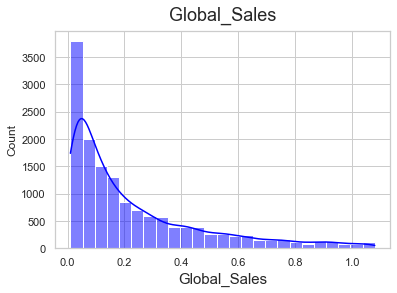

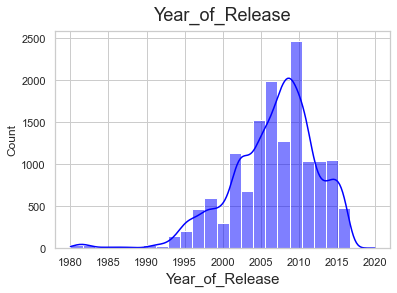

In [135]:
# Analyze Columns
plt_hist(df=df, col='Global_Sales', title='Global_Sales')
plt_hist(df=df, col='Year_of_Release', title='Year_of_Release')

## Analysis

In [136]:
# Group By Platform and Year_of_Release, then average all sales
df2 = df.groupby(['Platform', 'Year_of_Release'], as_index=False).mean()
df2.sample(n=9)

,Platform,Year_of_Release,Global_Sales
113,PC,2016.0,0.097593
141,PS3,2010.0,0.330338
149,PS4,2014.0,0.366471
114,PCFX,1996.0,0.030000
50,GBA,2003.0,0.217037
8,2600,1988.0,0.375000
130,PS2,2005.0,0.307557
164,PSP,2015.0,0.040000
29,DS,2007.0,0.190175


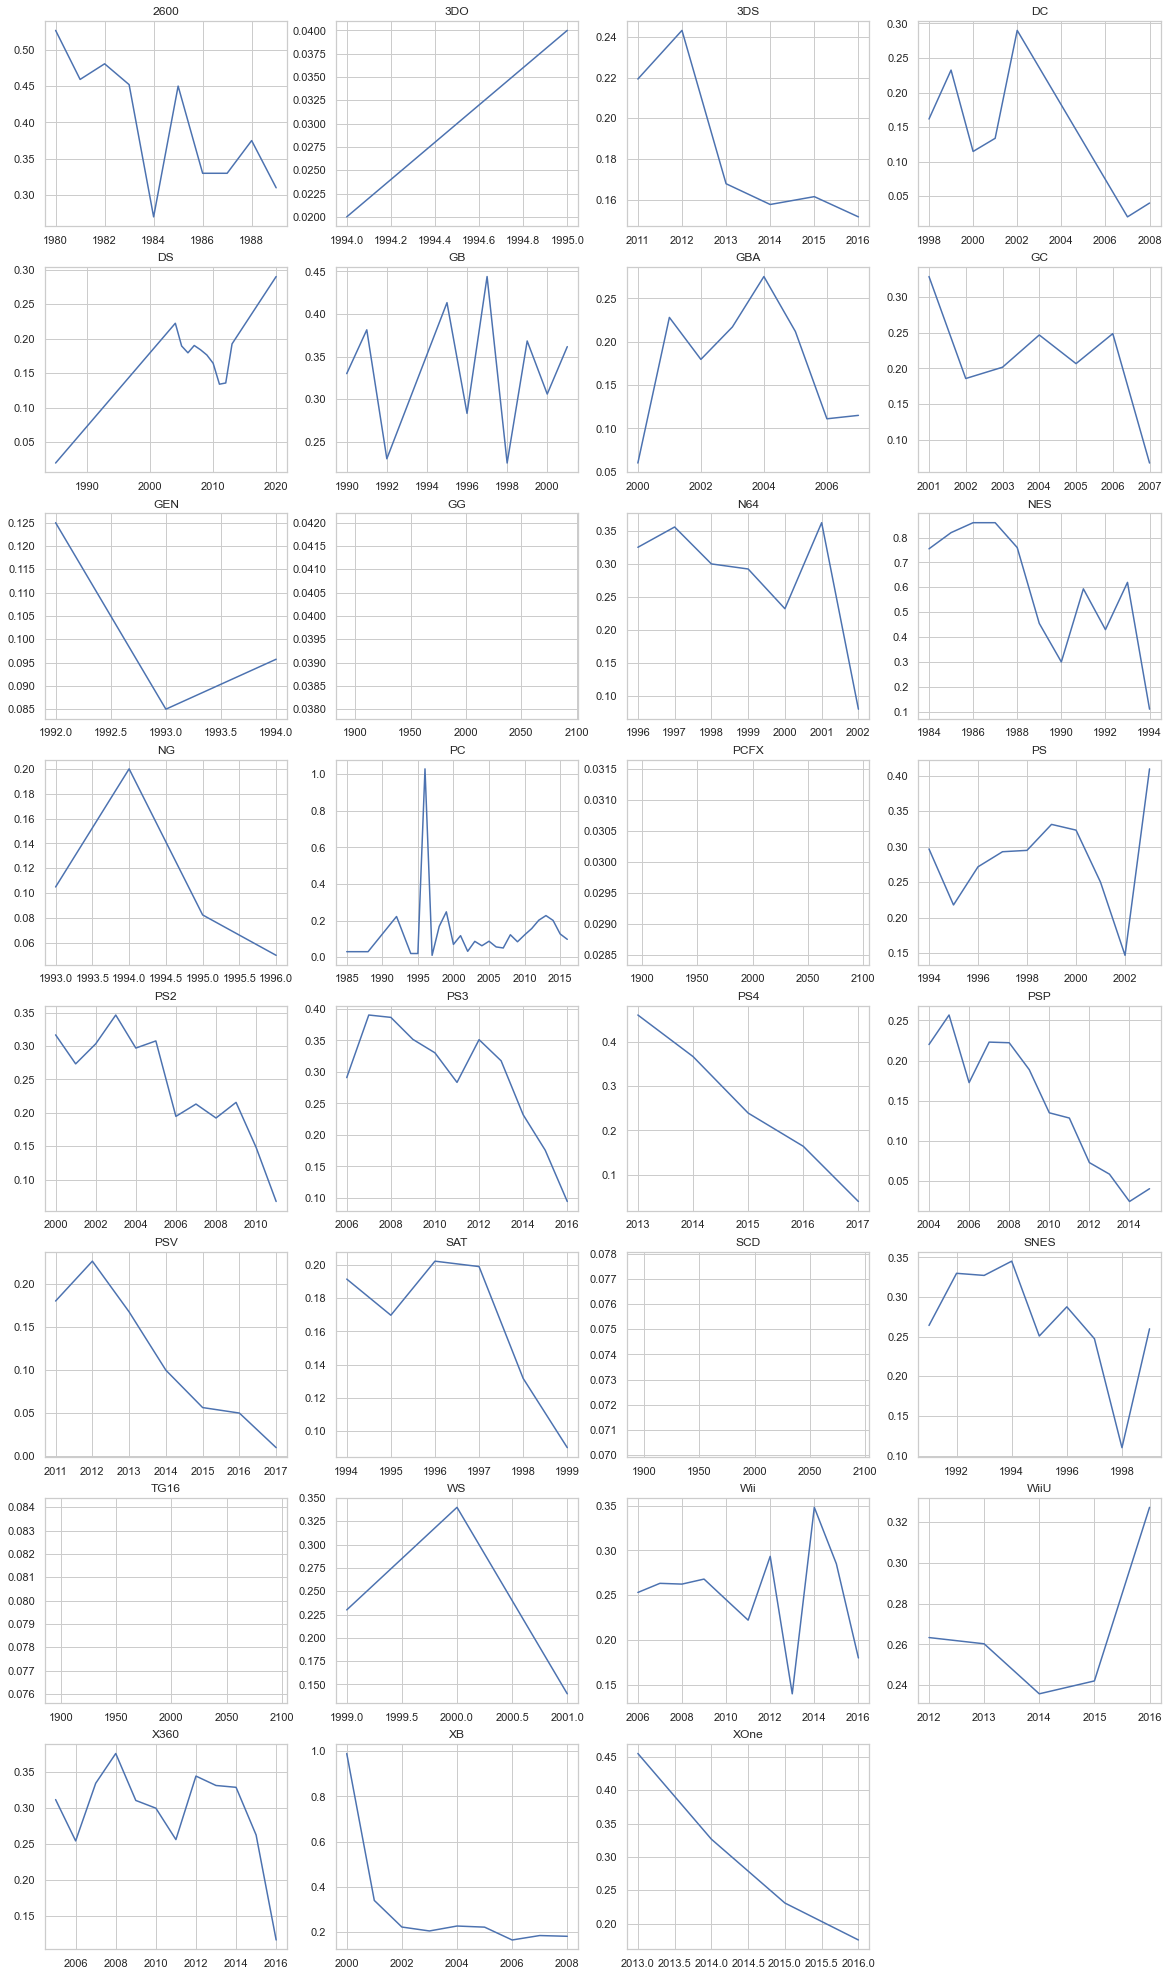

In [137]:
# for each platform, plot the sales over the years in a seperate plot
plt.figure(figsize=(20, 40))
for i, platform in enumerate(df2['Platform'].unique()):
    plt.subplot(9, 4, i+1)
    plt.title(platform)
    plt.plot(df2[df2['Platform'] == platform]['Year_of_Release'],
             df2[df2['Platform'] == platform]['Global_Sales'])

In [138]:
# Filter Platforms with less than N active years
print(df2.Platform.unique())
MIN_ACTIVE_YEARS = 5
for platform in df2.Platform.unique():
    K = df2[df2['Platform']==platform].shape[0]
    print(f'{platform} is active for {K} years')
    if K < MIN_ACTIVE_YEARS or platform == 'PC':
        print(f"Removing {platform} from dataset")
        df2 = df2[df2['Platform'] != platform]
#
print(df2.Platform.unique())
df2.sample(n=7)

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
2600 is active for 10 years
3DO is active for 2 years
Removing 3DO from dataset
3DS is active for 6 years
DC is active for 7 years
DS is active for 12 years
GB is active for 10 years
GBA is active for 8 years
GC is active for 7 years
GEN is active for 3 years
Removing GEN from dataset
GG is active for 1 years
Removing GG from dataset
N64 is active for 7 years
NES is active for 11 years
NG is active for 4 years
Removing NG from dataset
PC is active for 26 years
Removing PC from dataset
PCFX is active for 1 years
Removing PCFX from dataset
PS is active for 10 years
PS2 is active for 12 years
PS3 is active for 11 years
PS4 is active for 5 years
PSP is active for 12 years
PSV is active for 7 years
SAT is active for 6 years
SCD is active for 1 years
Removing SCD from dataset
SNES is active for 9 years
TG16 

,Platform,Year_of_Release,Global_Sales
172,SAT,1994.0,0.191579
131,PS2,2006.0,0.194592
38,GB,1991.0,0.381429
122,PS,2001.0,0.249880
185,SNES,1997.0,0.247500
115,PS,1994.0,0.296875
142,PS3,2011.0,0.283409


In [139]:
# Now we Need to extract active period for every platform
# we can say that active is from first year platform started achieving an average of 50% * its peak_mean
# to the last year it did
res = pd.DataFrame(columns=['Platform', 'Start_Year', 'End_Year', 'Active_Period'])
for i, platform in enumerate(df2.Platform.unique()):
    peak_mean = df2[df2['Platform'] == platform]['Global_Sales'].max()
    strt = df2[(df2['Platform'] == platform) & (df2['Global_Sales'] >= 0.5 * peak_mean)]['Year_of_Release'].min()
    end = df2[(df2['Platform'] == platform) & (df2['Global_Sales'] >= 0.5 * peak_mean)]['Year_of_Release'].max()
    print(f'ON {platform}, PEAK: {peak_mean:.3f}, FROM {strt:.0f} TO {end:.0f}, TOTAL: {end - strt +1:.0f} years')
    #
    res.loc[-1] = [platform, strt, end, end - strt + 1]
    res.index += 1
    res = res.sort_index()
#
res.sort_values(by=['Active_Period'], ascending=False)

ON 2600, PEAK: 0.527, FROM 1980 TO 1989, TOTAL: 10 years
ON 3DS, PEAK: 0.243, FROM 2011 TO 2016, TOTAL: 6 years
ON DC, PEAK: 0.290, FROM 1998 TO 2002, TOTAL: 5 years
ON DS, PEAK: 0.290, FROM 2004 TO 2020, TOTAL: 17 years
ON GB, PEAK: 0.444, FROM 1990 TO 2001, TOTAL: 12 years
ON GBA, PEAK: 0.275, FROM 2001 TO 2005, TOTAL: 5 years
ON GC, PEAK: 0.329, FROM 2001 TO 2006, TOTAL: 6 years
ON N64, PEAK: 0.362, FROM 1996 TO 2001, TOTAL: 6 years
ON NES, PEAK: 0.860, FROM 1984 TO 1993, TOTAL: 10 years
ON PS, PEAK: 0.410, FROM 1994 TO 2003, TOTAL: 10 years
ON PS2, PEAK: 0.346, FROM 2000 TO 2009, TOTAL: 10 years
ON PS3, PEAK: 0.390, FROM 2006 TO 2014, TOTAL: 9 years
ON PS4, PEAK: 0.460, FROM 2013 TO 2015, TOTAL: 3 years
ON PSP, PEAK: 0.257, FROM 2004 TO 2010, TOTAL: 7 years
ON PSV, PEAK: 0.227, FROM 2011 TO 2013, TOTAL: 3 years
ON SAT, PEAK: 0.202, FROM 1994 TO 1998, TOTAL: 5 years
ON SNES, PEAK: 0.345, FROM 1991 TO 1999, TOTAL: 9 years
ON Wii, PEAK: 0.348, FROM 2006 TO 2016, TOTAL: 11 years
ON Wii

,Platform,Start_Year,End_Year,Active_Period
17,DS,2004.0,2020.0,17.0
16,GB,1990.0,2001.0,12.0
1,X360,2005.0,2015.0,11.0
3,Wii,2006.0,2016.0,11.0
10,PS2,2000.0,2009.0,10.0
12,NES,1984.0,1993.0,10.0
11,PS,1994.0,2003.0,10.0
20,2600,1980.0,1989.0,10.0
9,PS3,2006.0,2014.0,9.0
4,SNES,1991.0,1999.0,9.0


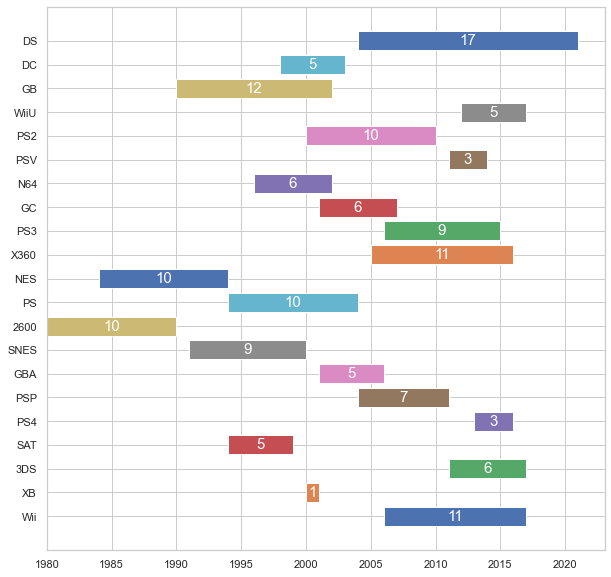

In [140]:
# shuffle rows of res
res = res.sample(frac=1).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 10))

for x, color in zip(res.values, sns.color_palette(n_colors=len(res))):
    platform, start, end, period = x
    ax.barh(platform, width=period, left=start, color=color)
    ax.text(start + period / 2, platform, f'{period:.0f}', ha='center', va='center', color='white', fontsize=15)
#

## Results Interpretation

In [141]:
# Use Thresholding to check if there is a significant difference between
# Active Periods of Platforms

max_diff = -1
max_platform1, max_platform2 = None, None
# loop on rows of res
for i in range(res.shape[0]):
    for j in range(i +1, res.shape[0]):
        platform1, active1 = res.iloc[i, 0], res.iloc[i, 3]
        platform2, active2 = res.iloc[j, 0], res.iloc[j, 3]
        #
        diff = abs(active1 - active2)
        if diff > max_diff:
            max_diff = diff
            max_platform1, max_platform2 = platform1, platform2


print(f'Max Diff: {max_diff:.0f} years')
print(f'Platforms: {max_platform1} and {max_platform2}')

Max Diff: 16 years
Platforms: XB and DS


### Future Work
q3 use std in threshold  
q3 filter min.games of every year of platform